<a href="https://colab.research.google.com/github/DanielDialektico/Machine-Learning/blob/main/Redes%20Neuronales/RNA_Clasificaci%C3%B3n_de_Prendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

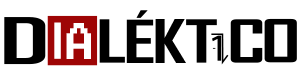

**ALGORITMO DE APRENDIZAJE SUPERVISADO** 🤖

# 1. Introducción
En esta práctica podrás observar y ejecutar la procreación y entrenamiento de un algoritmo de **aprendizaje supervisado** desde la carga del **conjunto de datos**, hasta la evaluación del **modelo** resultante. 

El fin de esto es que presencies cómo se concretan los **objetivos** que persigue el aprendizaje supervisado en cada diferente paso de su metodología, operando desde un espacio de programación en **Python**. 

Como se mencionó en la **[exploración](https://dialektico.com/aprendizaje-supervisado/)**, este algoritmo utilizará **redes neuronales artificiales** para aprender a realizar una tarea de clasificación. 



# 2. Objetivo

Como ya se ha establecido, el objetivo planteado es el de entrenar un modelo para otorgarle la capacidad de **clasificar** imágenes de ropa de acuerdo a **10 clases** diferentes, las cuales se pueden consultar en la siguiente tabla: <br>
<br>
<center>
<table>
  <tr>
    <th>Nombre de la prenda (salida)</th>
  </tr>
  <tr>
    <td>Playera/Blusa</td>
  </tr>
  <tr>
    <td>Pantalón</td>
  </tr>
    <tr>
    <td>Suéter</td>
  </tr>
    <tr>
    <td>Vestido</td>
  </tr>
    <tr>
    <td>Abrigo</td>
  </tr>
    <tr>
    <td>Sandalia</td>
  </tr>
    <tr>
    <td>Camisa</td>
  </tr>
    <tr>
    <td>Zapato/Tenis</td>
  </tr>
    <tr>
    <td>Bolsa</td>
  </tr>
    <tr>
    <td>Botín</td>
  </tr>
</table></center><br>
<br>

Para este código utilizaremos parte de las librerías antes vistas para **preprocesamiento** de datos, y sumaremos la librería [Tensorflow](https://www.tensorflow.org/), la cual fue desarrollada por **Google**, y será clave para el cumplimiento de nuestro objetivo, ya que sus funciones están expresamente enfocadas en el diseño de modelos de **machine learning**. 

# 3. Conjunto de datos

Las imágenes que utilizaremos para entrenar el modelo provienen del popular  conjunto de datos **[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)**, el cual es de acceso público y contiene más de **70,000** imágenes de ropa de baja resolución de las categorías antes mencionadas, en escala de grises, de tamaño 28x28. 

En la siguiente figura se puede observar una muestra de este conjunto de datos:
<center><table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
</table></center>

<center><b>Fig. 1</b> Pequeña muestra del conjunto de datos fashion MNIST</a> (Zalando, MIT License).</center>

# 4. Carga de datos y preprocesamiento

Para invocar al conjunto de datos a nuestro espacio de trabajo utilizaremos la API **[Keras](https://www.tensorflow.org/guide/keras?hl=es-419)** de la librería **tensorflow**, la cual nos permitirá almacenar los datos en un arreglo, en este caso, una **tupla**.

Ejecuta el siguiente bloque para cargar las librerías y los datos: 

In [1]:
#Se importan las librerías.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Se define el tipo de formato de las gráficas.
plt.style.use('seaborn-v0_8-whitegrid')

#Se ignoran las alertas.
warnings.filterwarnings('ignore')

#Se carga el conjunto de datos.
dataset = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Como sabemos por nuestro **[entrenamiento en preprocesamiento de datos](https://dialektico.com/introduccion-preprocesamiento/)**, toda **entrada** de un modelo de **machine learning** debe ser una estructura matemática legible para la máquina, por lo que debemos asegurarnos de que nuestro conjunto de datos esté acondicionado de esta manera. 

Afortunadamente, este conjunto ya provee la información en **formas matriciales**, es decir, cada imagen se expresa como una matriz, donde todo número contenido en esta representa un valor para cada **pixel**, en un rango de entre 0 y 255. A estar la imagen en escala de grises, el valor 0 corresponde al color **negro**, mientras que el 255 al **blanco**, y los valores intermedios a diferentes tonos de **grises**.

La **figura 2** muestra una ejemplificación de esto:



<center><img src="https://dialektico.com/wp-content/uploads/2023/03/Colab1.jpg"
         alt="Fashion MNIST sprite"  width="300"></center>

<center><b>Fig. 2</b> Relación entre los valores de una representación matricial de una imagen en escala de grises y sus correspondientes variaciones de color en escala de grises. Rescatado de <a href="https://www.researchgate.net/publication/325569674_Analysis_of_Emotions_From_Body_Postures_Based_on_Digital_Imaging">(Bradley & Lang, 1994b)</a></center>

Esto es una conversión típica en **visión computacional** (estudio del procesamiento de imágenes), y la exploraremos más a detalle cuando tengamos nuestros primeros encuentros con **redes neuronales convolucionales**.

Por el momento, solo nos limitaremos a observar una de las matrices asociadas a una imagen del conjunto de datos:

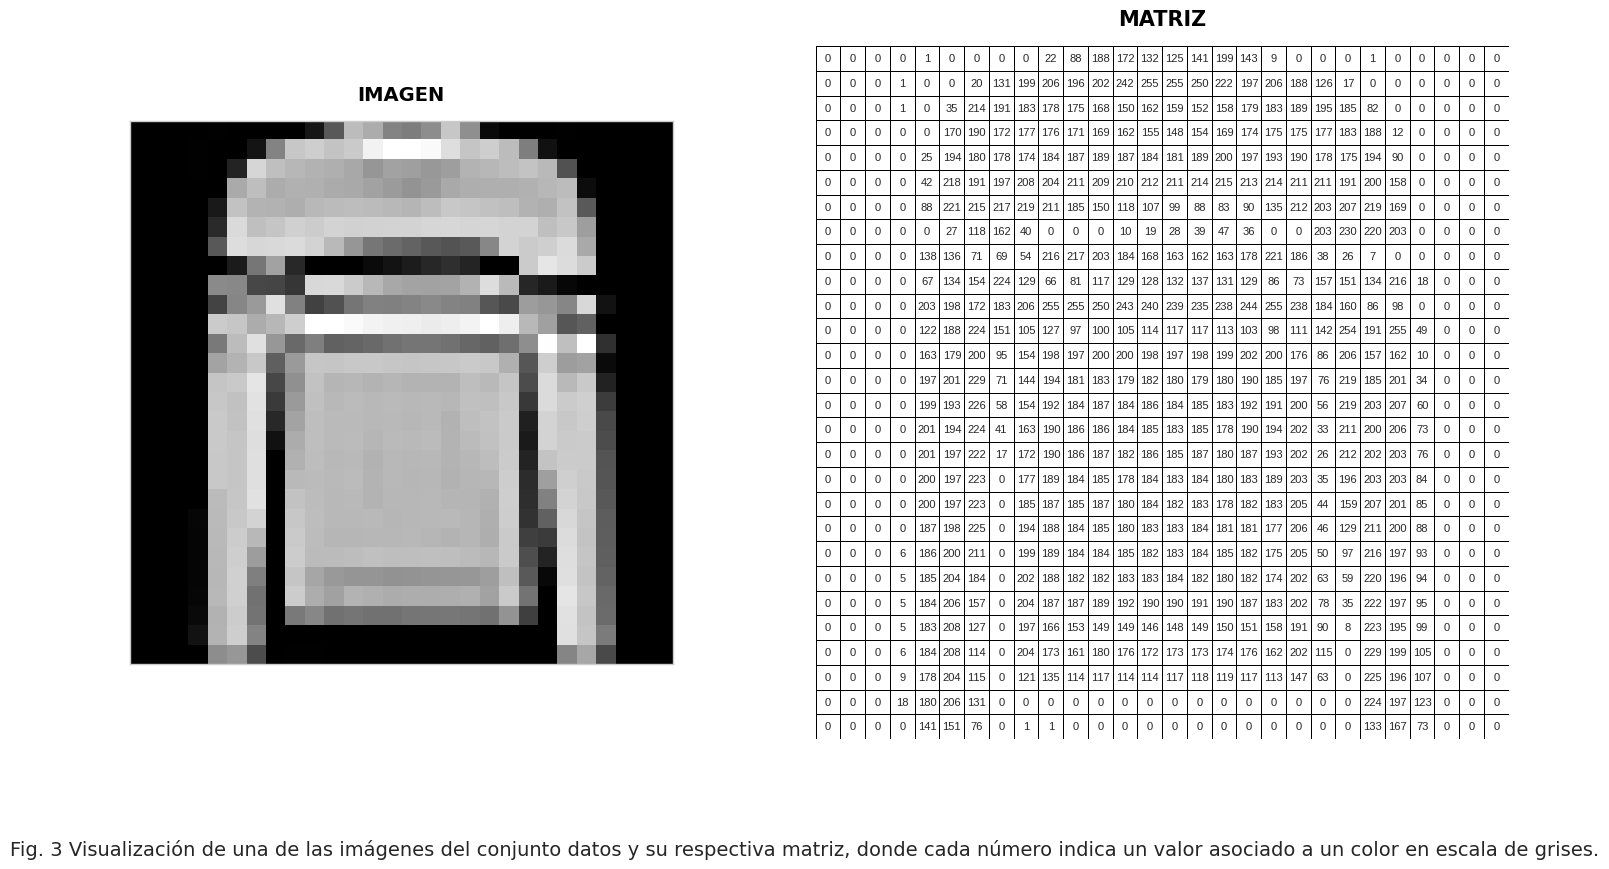

In [2]:
#Se selecciona una imagen del conjunto de datos.
matrix = dataset[0][0][5]

#Se imprime una imagen del conjunto de datos y su respectiva matriz.
fig, axs = plt.subplots(1, 2, figsize=(18, 9), gridspec_kw={'width_ratios': [1.5, 2]})

#Imagen.
axs[0].imshow(matrix, cmap='gray')
axs[0].set_title("IMAGEN", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14}, pad = 15)
axs[0].set_yticks([])
axs[0].set_xticks([])

#Matriz.
axs[1].set_facecolor('white')
sns.heatmap(matrix, fmt='d', annot=True, square=True, cmap='gray_r', vmin=0, vmax=0,
            linewidths=0.5, linecolor='k', cbar=False, ax=axs[1], annot_kws={'fontsize':8}) 

axs[1].set_title("MATRIZ", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 15}, pad = 15)
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

plt.suptitle("Fig. 3 Visualización de una de las imágenes del conjunto datos y su respectiva matriz, donde cada número indica un valor asociado a un color en escala de grises.", 
             fontproperties = {'family': 'DejaVu Sans', 'size': 14}, y=-0.001)
plt.show()

En la **figura 3** se despliega la comparación entre una imagen del conjunto de datos (a la izquierda), y su matriz con los valores de cada pixel (lado derecho).

Dado que no hay mucho **preprocesamiento** que aplicar a estas imágenes, solo se dividirá el conjunto de datos en los conjuntos de **entrenamiento** (train) y **prueba** (test), se asignarán nombres a las **categorías**, y se **normalizarán** los valores de todas las matrices dividiéndolos entre su valor máximo: **255**.

En el siguiente bloque se efectuarán las **divisiones** del conjunto de datos (cuyas longitudes ya fueron definidas por quienes lo crearon), la asignación de los nombres de las **etiquetas**, la **normalización** de los datos, y se imprimirá el número de ejemplos de imágenes de cada subconjunto:



In [3]:
#Se definen las entradas y salidas de conjuntos de entrenamiento y prueba respectivamente.
(train_inputs, train_outputs), (test_inputs, test_outputs) = dataset

#Se normalizan los datos.
train_images = train_inputs / 255.0
test_images = test_inputs / 255.0

#Se definen los nombres de cada categoría
class_names = ['Playera/Blusa', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapato/tenis', 'Mochila', 'Botín']

#Se imprimen las longitudes de los conjuntos:
print('Número de ejemplos de entrenamiento en el conjunto de entrenamiento: ' + str(len(train_inputs)))
print('Número de ejemplos de entrenamiento en el conjunto de prueba: ' + str(len(test_inputs)))

Número de ejemplos de entrenamiento en el conjunto de entrenamiento: 60000
Número de ejemplos de entrenamiento en el conjunto de prueba: 10000


Podemos observar que se tiene una distribución de imágenes de alrededor de 85% del total para el conjunto de **entrenamiento**, y 15% para el de **prueba**.  

# 5. Entrenamiento del modelo

Ahora que hemos cargado los datos, podemos crear y entrenar el **modelo** para que aprenda a **clasificar** prendas. Los detalles sobre cómo sucede esto los aprenderemos en próximas expediciones, hoy solo lo veremos en acción. 

El siguiente bloque **entrenará** al modelo de **aprendizaje automático** durante **8 épocas** (8 iteraciones), es decir, se procesará la información 10 veces con el fin de extraer **patrones** para la concreción de nuestro objetivo. Al ejecutar el código, podrás ver cómo se imprimen los resultados para cada época (**Epoch**). El valor de **accuracy** al final de cada línea es el valor de la **precisión** de clasificación del modelo.

**Nota**: tardará poco más de un minuto en ejecutarse.

In [4]:
#Se define el modelo de redes neuronales artificiales y se compila.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_inputs, train_outputs, epochs=8, verbose = 1)

test_loss, test_acc = model.evaluate(test_inputs,  test_outputs, verbose=0)

#Se imprime la precisión de predicción del modelo.
print('\nPrecisión de predicción final:', test_acc)

Epoch 1/8
1875/1875 [==============================] - 16s 7ms/step - loss: 2.2554 - accuracy: 0.7365
Epoch 2/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6359 - accuracy: 0.7932
Epoch 3/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5717 - accuracy: 0.8089
Epoch 4/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5702 - accuracy: 0.8064
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4860 - accuracy: 0.8329
Epoch 6/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4448 - accuracy: 0.8425
Epoch 7/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4250 - accuracy: 0.8499
Epoch 8/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4100 - accuracy: 0.8542

Precisión de predicción final: 0.8438000082969666


Al final observarás una **precisión** de predicción por encima del **80%**. La intención de este modelo fue entrenarlo con una **arquitectura** que no generara una precisión cercana al 100% para poder presenciar un modelo que aún puede ser **optimizado**.  En este caso, podríamos hacer algunas adecuaciones, como utilizar **capas convolucionales**, entre otros ajustes a los **hiperparámetros**, pero de esto hablaremos luego. 

# 6. Clasificando prendas con el modelo entrenado


El modelo está entrenado y listo para realizar predicciones. Al ejecutar la siguiente casilla de código le darás una **imagen**, este la **procesará** y nos dirá a qué clase "**piensa**" que pertenece. 

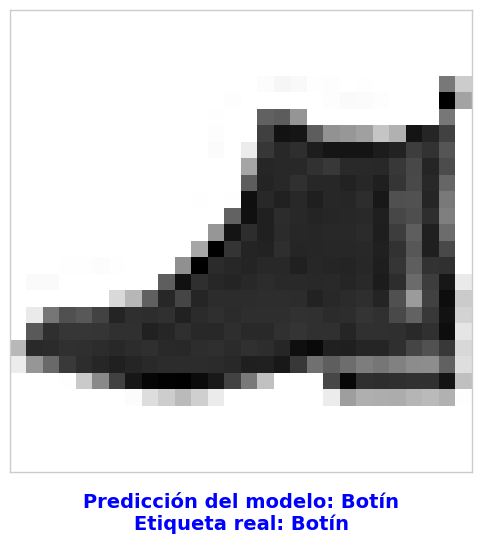

In [9]:
#Se realizan las predicciones con nuevas imágenes.
predictions = model.predict(test_inputs, verbose = 0)

#Se define una función para el despliegue de la imagen testeada, junto a su probabilidad de categorización estimada, y su etiqueta verdadera.
def plot_image(image_indx, predictions_arr, true_output, image, font_size):
  predictions_arr, true_output, image, font_size = predictions_arr, true_output[image_indx], image[image_indx], font_size
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(image, cmap=plt.cm.binary)

  predicted_output = np.argmax(predictions_arr)
  if predicted_output == true_output:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('Predicción del modelo: ' + str(class_names[predicted_output]) + '\n'
              + 'Etiqueta real: ' + str(class_names[true_output]),
              color=color, fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': font_size}, labelpad=15)

#Se selecciona la imagen número 160 del conjunto de datos, se entrega al modelo, y se grafican los resultados.
image_indx = 165
plt.figure(figsize=(6,6))
plt.plot
plot_image(image_indx, predictions[image_indx], test_outputs, test_inputs, 14)

El resultado es una imagen con dos líneas de texto adjuntas:


*   La primera indica a qué **categoría** ha asignado el modelo a la imagen de entrada.
*   La segunda muestra la **etiqueta** real de la imagen, extraída del conjunto de datos de prueba.


Nos podemos percatar de que en la primera línea de texto el modelo ha etiquetado como **botín** a la imagen que le hemos proporcionado, y que esta coincide con la etiqueta **real** mostrada debajo, lo cual nos indica que el modelo **acertó** en su **clasificación**.

**Nota**: si el color de las letras es **azul**, quiere decir que la predicción fue exitosa, en caso contrario, se mostrarán teñidas de **rojo**.

Probemos ahora con una imagen diferente:

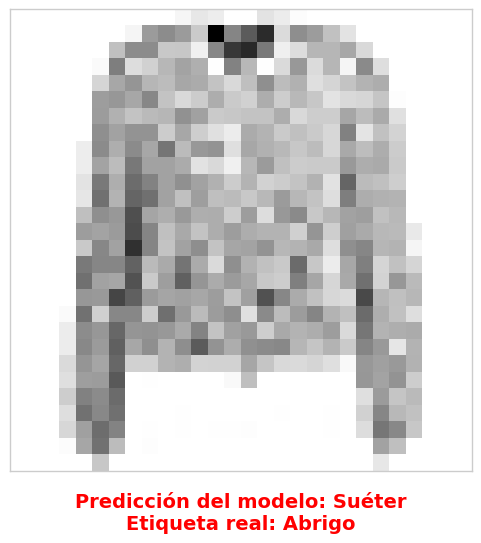

In [10]:
#Se etiqueta, evalúa y grafica una imagen nueva.
image_indx = 51
plt.figure(figsize=(6,6))
plt.plot
plot_image(image_indx, predictions[image_indx], test_outputs, test_inputs, 14)

En este caso, dependiendo de cómo se entrenó tu red, puede que esta haga una predicción errónea, etiquetando al abrigo como otra prenda diferente.

Finalmente, para una visualización más amplia del rendimiento del modelo, en el siguiente fragmento lo utilizaremos para clasificar un grupo de **15 imágenes diferentes**. (Recuerda que aquellas acompañadas por textos color **rojo** representan imágenes mal etiquetadas).

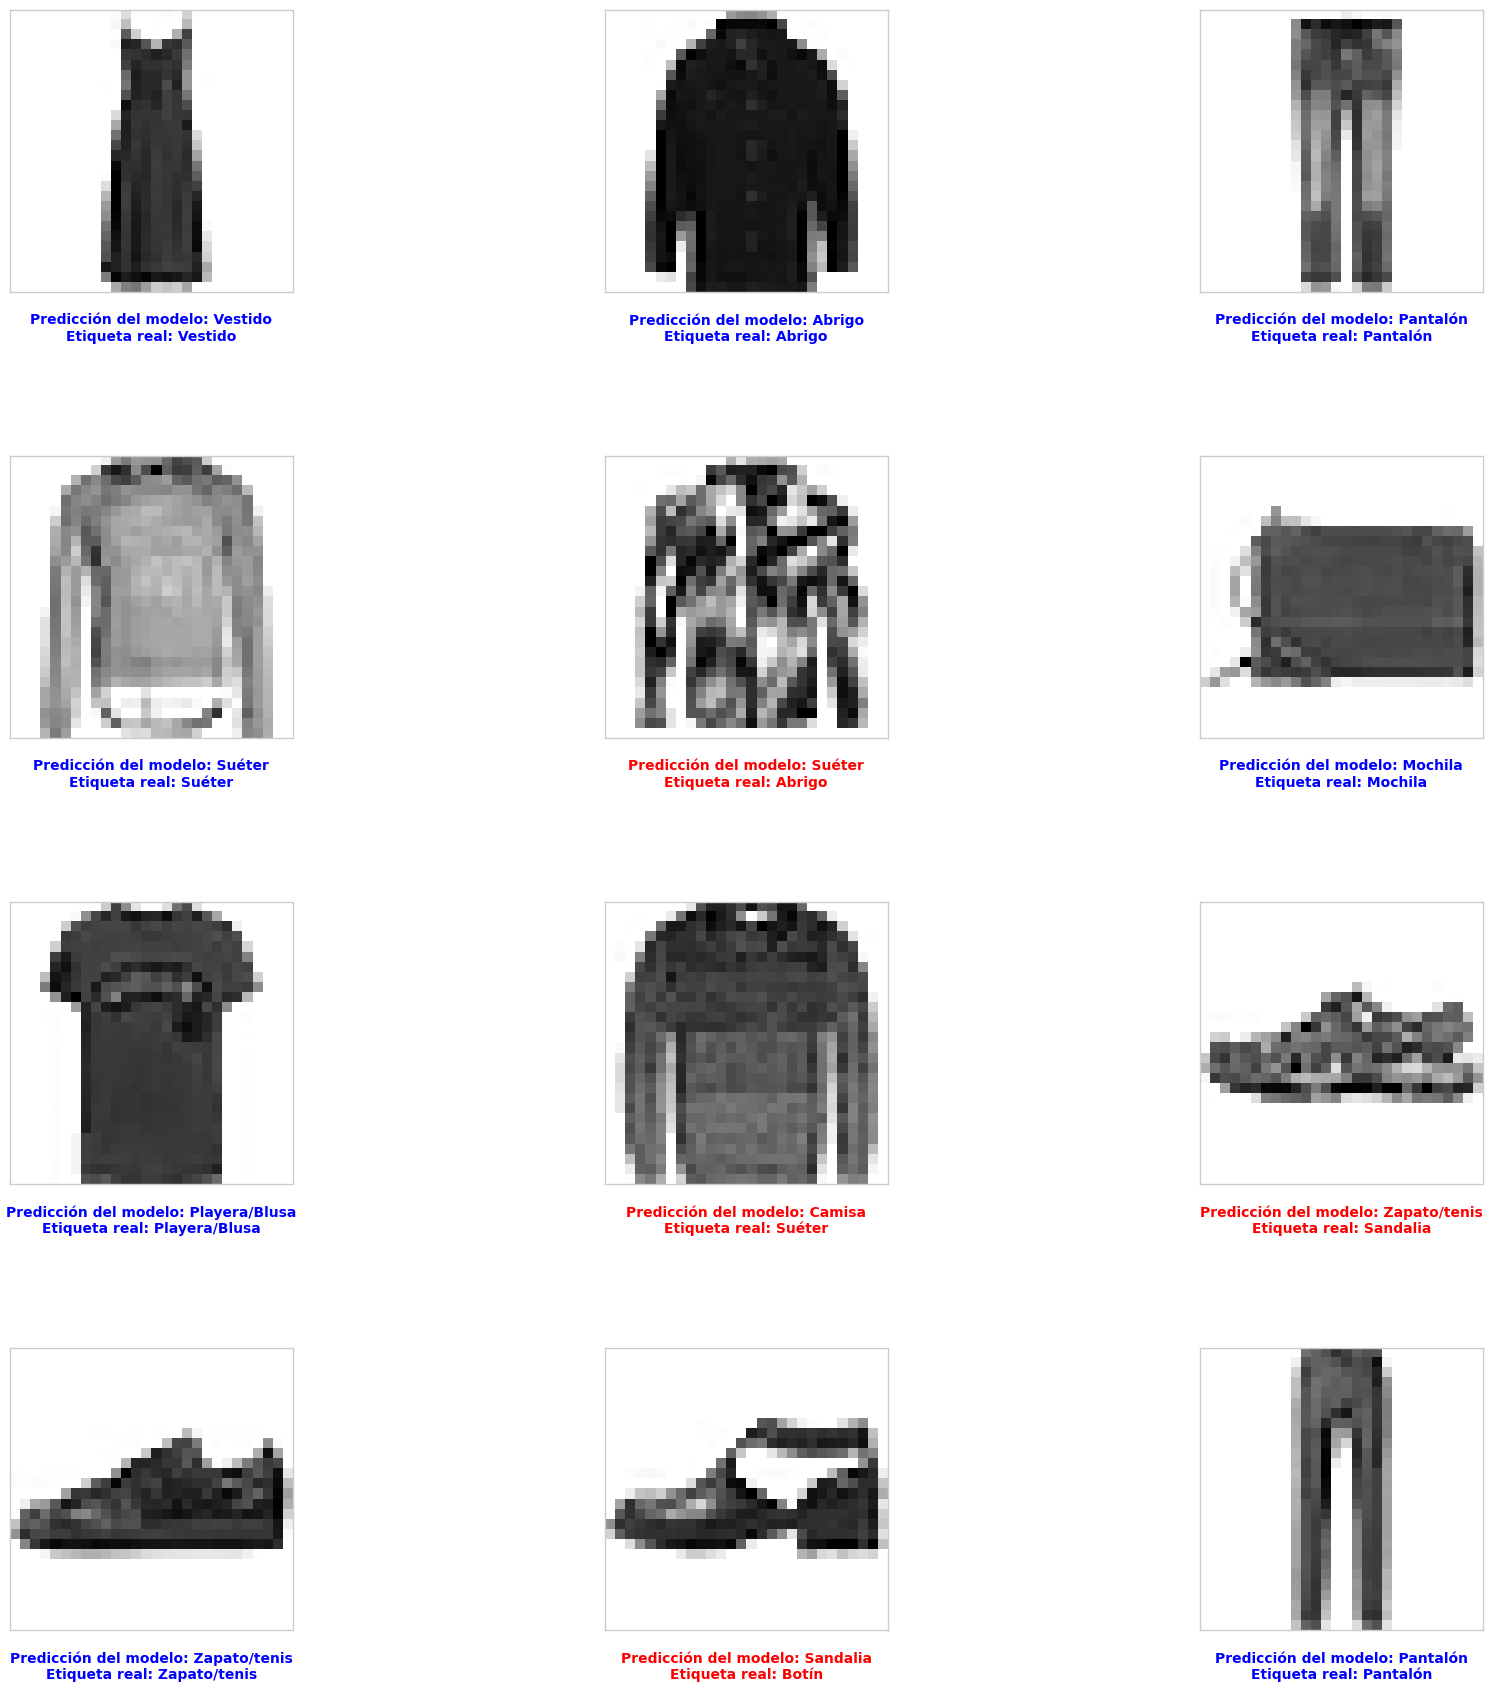

In [7]:
#Se evalúan y grafican 15 imágenes del conjunto de datos.
num_rows = 4
num_cols = 3
j=0

plt.figure(figsize=(18, 18))
for i in range(13,25):
  plt.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, predictions[i], test_outputs, test_inputs, 10)
  j = j + 1
plt.tight_layout()
plt.show()

Notarás que la mayoría de las imágenes fueron clasificadas de forma exitosa, pero con algunos errores de predicción.


## Define tus propias pruebas

Por último, tienes la libertad de utilizar cualquier imagen que desees del conjunto de datos de **prueba** y hacer que el modelo la clasifique. Lo único que tienes que hacer es modificar la **primera línea** del siguiente fragmento de código, agregando un número entre el **0** y el **9999**. 

Una vez que hayas colocado el número, ejecuta el programa para observar el resultado.

In [ ]:
image_indx = #Escribe aquí un número entre el 0 y el 9999

plt.figure(figsize=(7,7))
plt.plot
plot_image(image_indx, predictions[image_indx], test_outputs, test_inputs, 14)

Con esto concluye nuestro primer acercamiento a los **algoritmos de aprendizaje supervisado**, en este caso, una **red neuronal artificial**, también conocida como **perceptrón o perceptrón multicapa**. 

Recuerda que esto es solo ilustrativo, en las próximas exploraciones comprenderemos cómo operan y se elaboran todo tipo de **modelos** de **aprendizaje de máquinas**.

▶ [Regresar a la lección](https://dialektico.com/aprendizaje-supervisado/) 🧙

In [11]:
# MIT License
#
# Copyright (c) 2023 Daniel García
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.